These transformations are done and the outputs will be saved tio /scratch folder because they should be on the whole cube instead of the subcubes. 

* Min-max scaling [0,1] 
* Min-max scaling [-1,1]
* standardizing -> (x - mean )/ stddev
* standardizing and scaling [0,1]
* standardizing and scaling [-1,1]
* square root transformation
* box-cox transformation
* box-cox transformation and scaling [0,1]
* box-cox transformation and scaling [-1,1]
* box-cox transformation and standardizing
* standardizing and box-cox transformation
* reciprocal transformation and scaling [0,1]
* reciprocal transformation and scaling [-1,1]

In [9]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [10]:
datapath=''
redshift = '1.0'
f = h5py.File(datapath+'fields_z='+redshift+'.hdf5', 'r')
f=f['delta_HI']

# Helper Functions

## Get max of whole cube

In [11]:
def get_max_cube(f):
    max_list = []
    for i in range(f.shape[0]):
        #print(np.max(f[i:i+1,:,:]))
        max_list.append(np.max(f[i:i+1,:,:]))
    max_cube = max(max_list)
    return max_cube

max_cube = get_max_cube(f = f)
max_cube

11269703000.0

## Get min of whole cube

In [12]:
def get_min_cube(f):
    min_list = []
    for i in range(f.shape[0]):
        #print(np.max(f[i:i+1,:,:]))
        min_list.append(np.min(f[i:i+1,:,:]))
    min_cube = min(min_list)
    return min_cube

min_cube = get_min_cube(f = f)
min_cube

0.0

## Get mean of whole cube

In [13]:
def get_mean_cube(f):
    mean_list = []
    for i in range(f.shape[0]):
        #print(np.max(f[i:i+1,:,:]))
        mean_list.append(np.mean(f[i:i+1,:,:]))
    mean_cube = np.mean(mean_list)
    return mean_cube

mean_cube = get_mean_cube(f = f)
mean_cube

8658.475

## Get stddev of whole cube

In [14]:
def get_stddev_cube(f, mean_cube):
    variance_list = []
    for i in range(f.shape[0]):
        variance_list.append(np.mean(np.square(f[i:i+1,:,:] - mean_cube)))
    stddev_cube = np.sqrt(np.mean(variance_list))
    return stddev_cube

stddev_cube = get_stddev_cube(f = f, mean_cube = mean_cube)
stddev_cube

2636760.2

# Min-Max Scaling [0,1]

In [ ]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

In [ ]:
whole_new_f[0:1,:,:].shape

In [ ]:
for i in range(f.shape[0]):
    whole_new_f[i:i+1,:,:] = (f[i:i+1,:,:] - min_cube)/(max_cube-min_cube)

In [ ]:
whole_new_f[0,:,:]

In [ ]:
whole_new_f.shape

In [ ]:
whole_new_f.mean()

In [ ]:
whole_new_f.min()

In [ ]:
whole_new_f.max()

In [ ]:
hf = h5py.File('minmax_scale_01_redshift1.h5', 'w')

In [ ]:
hf.create_dataset('delta_HI', data=whole_new_f)

In [ ]:
hf.close()

# Min-Max Scaling [-1,1]

In [ ]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

In [ ]:
for i in range(f.shape[0]):
    whole_new_f[i:i+1,:,:] = 2* (f[i:i+1,:,:] - min_cube)/(max_cube-min_cube) - 1

In [ ]:
whole_new_f.shape

In [ ]:
whole_new_f.mean()

In [ ]:
get_stddev_cube(f=whole_new_f, mean_cube=mean_cube)

In [ ]:
whole_new_f.min()

In [ ]:
whole_new_f.max()

In [ ]:
hf = h5py.File('minmax_scale_neg11_redshift1.h5', 'w')

In [ ]:
hf.create_dataset('delta_HI', data=whole_new_f)

In [ ]:
hf.close()

# Standardizing

In [8]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [15]:
for i in range(f.shape[0]):
    whole_new_f[i:i+1,:,:] = (f[i:i+1,:,:] - mean_cube)/ stddev_cube
    

In [16]:
whole_new_f.shape

(2048, 2048, 2048)

In [17]:
whole_new_f.mean()

5.36335680841665e-11

In [18]:
whole_new_f.min()

-0.0032837549224495888

In [19]:
whole_new_f.max()

4274.06884765625

In [20]:
hf = h5py.File('standardized_redshift1.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

# Box Cox Transformations

In [ ]:
#102918, SB

In [59]:
%run get_samples.py

In [60]:
def get_lambda_boxcox(subcube, shift):
    
#     flat_cube = trial_sample[0].flatten()
    flat_cube = subcube.flatten()
    
    # shifting with a positive constant to flat_cube for positiveness constraint
    flat_cube = flat_cube + shift
    
    xt, maxlog, interval = stats.boxcox(flat_cube, alpha=0.05)
    print("lambda = {:g}".format(maxlog))
    
    return maxlog

In [69]:
no_subcube = 500
shift = 1.0

testcd = define_test(s_test = 1024,s_train = 128)
print(testcd)

maxlog_list = []

# get a random subcubes
trial_sample = get_samples(s_sample = 128, 
                        nsamples = no_subcube, 
                        h5_filename = "fields_z=1.0.hdf5", 
                        test_coords = testcd)
#     trial_sample[0].shape

for i in range(no_subcube):

    maxlog = get_lambda_boxcox(subcube = trial_sample[i],
                               shift = shift)
    maxlog_list.append(maxlog)



{'x': [512, 1536], 'y': [384, 1408], 'z': [1024, 2048]}
Sampling finished.
Counter = 1 / 500
Counter = 2 / 500
Counter = 3 / 500
Counter = 4 / 500
Counter = 5 / 500
Counter = 6 / 500
Counter = 7 / 500
Counter = 8 / 500
Counter = 9 / 500
Counter = 10 / 500
Counter = 11 / 500
Counter = 12 / 500
Counter = 13 / 500
Counter = 14 / 500
Counter = 15 / 500
Counter = 16 / 500
Counter = 17 / 500
Counter = 18 / 500
Counter = 19 / 500
Counter = 20 / 500
Counter = 21 / 500
Counter = 22 / 500
Counter = 23 / 500
Counter = 24 / 500
Counter = 25 / 500
Counter = 26 / 500
Counter = 27 / 500
Counter = 28 / 500
Counter = 29 / 500
Counter = 30 / 500
Counter = 31 / 500
Counter = 32 / 500
Counter = 33 / 500
Counter = 34 / 500
Counter = 35 / 500
Counter = 36 / 500
Counter = 37 / 500
Counter = 38 / 500
Counter = 39 / 500
Counter = 40 / 500
Counter = 41 / 500
Counter = 42 / 500
Counter = 43 / 500
Counter = 44 / 500
Counter = 45 / 500
Counter = 46 / 500
Counter = 47 / 500
Counter = 48 / 500
Counter = 49 / 500
Cou

Counter = 415 / 500
Counter = 416 / 500
Counter = 417 / 500
Counter = 418 / 500
Counter = 419 / 500
Counter = 420 / 500
Counter = 421 / 500
Counter = 422 / 500
Counter = 423 / 500
Counter = 424 / 500
Counter = 425 / 500
Counter = 426 / 500
Counter = 427 / 500
Counter = 428 / 500
Counter = 429 / 500
Counter = 430 / 500
Counter = 431 / 500
Counter = 432 / 500
Counter = 433 / 500
Counter = 434 / 500
Counter = 435 / 500
Counter = 436 / 500
Counter = 437 / 500
Counter = 438 / 500
Counter = 439 / 500
Counter = 440 / 500
Counter = 441 / 500
Counter = 442 / 500
Counter = 443 / 500
Counter = 444 / 500
Counter = 445 / 500
Counter = 446 / 500
Counter = 447 / 500
Counter = 448 / 500
Counter = 449 / 500
Counter = 450 / 500
Counter = 451 / 500
Counter = 452 / 500
Counter = 453 / 500
Counter = 454 / 500
Counter = 455 / 500
Counter = 456 / 500
Counter = 457 / 500
Counter = 458 / 500
Counter = 459 / 500
Counter = 460 / 500
Counter = 461 / 500
Counter = 462 / 500
Counter = 463 / 500
Counter = 464 / 500


lambda = -1.79635
lambda = -1.94051
lambda = -1.18745
lambda = -1.72541
lambda = -2.7308
lambda = -2.01892
lambda = -4.62111
lambda = -1.71506
lambda = -2.09299
lambda = -1.55421
lambda = -2.1974
lambda = -2.57917
lambda = -1.81774
lambda = -5.7553
lambda = -2.61655
lambda = -3.52776
lambda = -1.82384
lambda = -1.7242
lambda = -4.11142
lambda = -1.55143
lambda = -5.16416
lambda = -1.72469
lambda = -2.16825
lambda = -2.13644
lambda = -2.05779
lambda = -1.55485
lambda = -1.36352
lambda = -2.46737
lambda = -4.23126
lambda = -1.4146
lambda = -3.38055
lambda = -1.66608
lambda = -1.30582
lambda = -1.46863
lambda = -2.82136
lambda = -2.16715
lambda = -3.16408
lambda = -1.39374
lambda = -1.55708
lambda = -1.6027
lambda = -1.60646
lambda = -1.35427
lambda = -2.07207
lambda = -1.99521
lambda = -1.50195
lambda = -4.86052
lambda = -2.04193
lambda = -2.48096
lambda = -2.06099
lambda = -1.92113
lambda = -2.0676
lambda = -1.62748
lambda = -4.52927
lambda = -1.99667
lambda = -2.28523
lambda = -1.98745

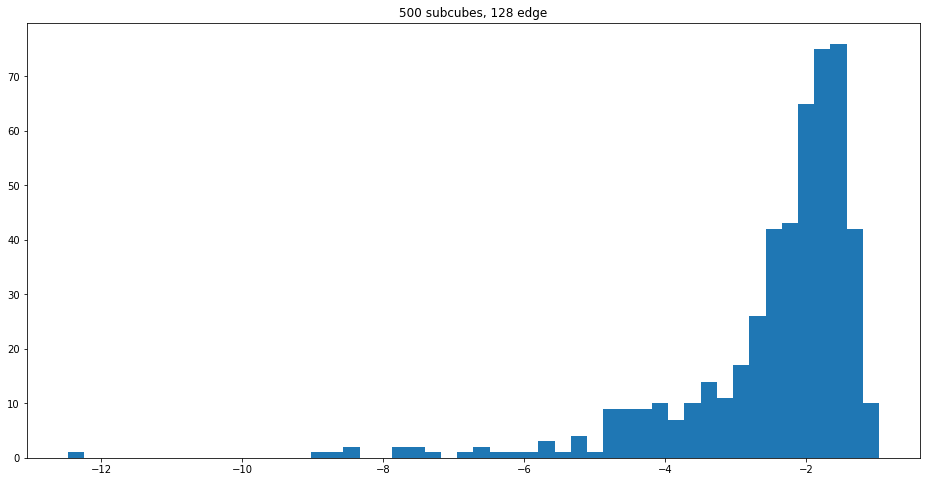

In [71]:
plt.figure(figsize=(16,8))
plt.title("500 subcubes, 128 edge")
_ = plt.hist(maxlog_list, bins = 50)

Using the best estimation for the lambda to convert the whole cube:

In [74]:
print(np.median(np.array(maxlog_list)))
print(np.array(maxlog_list).mean())

-2.054718380766178
-2.4869664835481404


In [76]:
best_lambda = np.median(np.array(maxlog_list))
best_lambda

-2.054718380766178

In [87]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [88]:
i = 0

def boxcox_transform(f_wall):
    
#     flat_cube = f[i:i+1,:,:]
    flat_cube = f_wall
    # flat_cube = flat_cube.flatten()
    flat_cube = flat_cube + shift
#     print(len(flat_cube))

    xt = stats.boxcox(flat_cube, lmbda = best_lambda)
#     print(xt.shape)
    
    return xt

boxcox_transform(f_wall = f[i:i+1,:,:])

array([[[0.01423424, 0.        , 0.        , ..., 0.        ,
         0.        , 0.15768795],
        [0.        , 0.15960725, 0.06340617, ..., 0.        ,
         0.22577764, 0.03414862],
        [0.01606615, 0.05065046, 0.01761026, ..., 0.        ,
         0.09053455, 0.01176273],
        ...,
        [0.        , 0.        , 0.0049104 , ..., 0.        ,
         0.        , 0.        ],
        [0.18112671, 0.07281356, 0.02402313, ..., 0.1032445 ,
         0.        , 0.        ],
        [0.09171937, 0.02912485, 0.        , ..., 0.03091806,
         0.        , 0.14065303]]], dtype=float32)

In [89]:
for i in range(f.shape[0]):
    if i % 250 == 0:
        print(str(i) + " / " + str(f.shape[0]))
    
    whole_new_f[i:i+1,:,:] = boxcox_transform(f_wall = f[i:i+1,:,:])
    

In [90]:
print(whole_new_f.shape)
print(whole_new_f.mean())
print(whole_new_f.min())
print(whole_new_f.max())

(2048, 2048, 2048)
0.13956263593612545
0.0
0.4866846799850464


In [93]:
hf = h5py.File('boxcox_' + "{0:.2f}".format(best_lambda) + \
               'lambda_redshift1.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

#### Sampling a subcube and looking at the distribution

In [100]:
no_subcube = 1

testcd = define_test(s_test = 1024,s_train = 128)
print(testcd)

# get a random subcubes
trial_sample = get_samples(s_sample = 128, 
                        nsamples = 1, 
                        h5_filename = "boxcox_-2.05lambda_redshift1.h5", 
                        test_coords = testcd)
trial_sample[0].shape

{'x': [256, 1280], 'y': [128, 1152], 'z': [768, 1792]}
Sampling finished.
Counter = 1 / 1


(128, 128, 128)

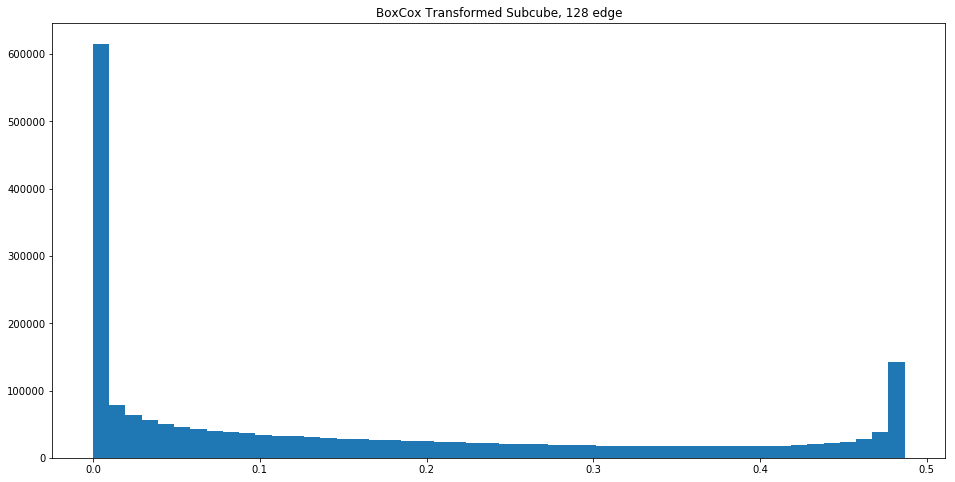

In [101]:
plt.figure(figsize=(16,8))
plt.title("BoxCox Transformed Subcube, 128 edge")
_ = plt.hist(trial_sample[0].flatten(), bins = 50)

Text(0.5,1,'Probplot after Box-Cox transformation')

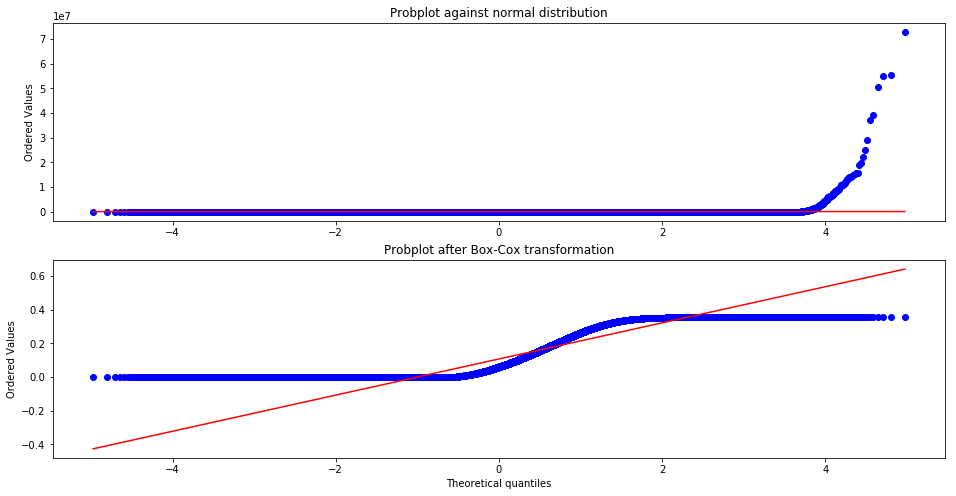

In [6]:
#plotting 
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
#x = stats.loggamma.rvs(5, size=500) + 5
stats.probplot(flat_cube, 
               dist=stats.norm, 
               plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(flat_cube)
stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

In [ ]:
# #raw data
# #n, bins, patches = plt.hist(x=flat_cube, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
# bins = np.arange(0,max(flat_cube),10000)
# plt.hist(x=(flat_cube), bins='auto')
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Raw data histogram')

Text(0.5,1,'Box cox transformed data histogram')

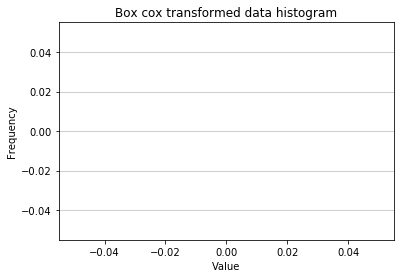

In [7]:
#histogram of the transformed data
#n, bins, patches = plt.hist(x=xt, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
bins = np.arange(0,max(xt),10000)
plt.hist(x=(xt), bins=bins)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Box cox transformed data histogram')

In [ ]:
#normality plot
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(flat_cube[:10000], -50, 50, plot=ax)
_, maxlog = stats.boxcox(flat_cube[:10000])
ax.axvline(maxlog, color='r')

In [ ]:
############################
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
#final function
#f = input data
#s => 0 = [0,1] transformed
#     1 = [-1,1] tansfomed
def box_cox_transform_and_scale(f,s=0):
    flat_cube = f.flatten() 
    #shift data to make it positive
    flat_cube = flat_cube + min(flat_cube) + 0.1
    xt, _ = stats.boxcox(flat_cube)
    if(s==0):
    #[0,-1] scaling
        scaled = (xt - min(xt))/(max(xt)-min(xt))
    else:
        scaled = 2*(xt - min(xt))/(max(xt)-min(xt))- 1
    return scaled


In [ ]:
bct = box_cox_transform_and_scale(f[:100,:100,:100])
